In [1]:
import pandas as pd
df_features = pd.read_csv('rba-dataset-feature.csv')

In [2]:
df_features.head()

,ip_address,country,asn,os_detail,is_login_success
0,92.221.109.162,NO,29695,Mac OS X 10.14.6,True
1,84.48.61.135,NO,15659,Mac OS X 10.14.6,True
2,156.52.48.83,NO,29695,Mac OS X 10.14.6,True
3,81.166.109.168,NO,29695,Mac OS X 10.14.6,True
4,46.183.175.255,NO,197475,Chrome OS 11316.123.0,False


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.tree import plot_tree, export_text
import category_encoders as ce

import matplotlib.pyplot as plt
import ipaddress

#encoder = ce.OneHotEncoder(cols= ['country', 'os_detail', 'ip_address'])

#df_encoded = encoder.fit_transform(df_features)

# Encode IP addresses as integers
df_features['ip_address_encoded'] = df_features['ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df_features, columns=['country', 'os_detail'], prefix=['country', 'os_detail'])

df_encoded.head()

,ip_address,asn,is_login_success,ip_address_encoded,country_AL,country_AO,country_AR,country_AT,country_AU,country_BD,...,os_detail_Mac OS X 10.8.2,os_detail_Mac OS X 10.8.4,os_detail_Mac OS X 10.9.2,os_detail_Mac OS X 10.9.4,os_detail_Mac OS X 11.3.5,os_detail_Mac OS X 11.6.3,os_detail_Slackware,os_detail_Windows 8,os_detail_Windows 8.1,os_detail_Windows XP
0,92.221.109.162,29695,True,1558015394,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84.48.61.135,15659,True,1412447623,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,156.52.48.83,29695,True,2620665939,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,81.166.109.168,29695,True,1369861544,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.183.175.255,197475,False,783790079,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Evaluation

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [4]:
# Separate the features (X) and the target (y)
X = df_encoded.drop(columns=['is_login_success', 'ip_address'])
#X = df_encoded.drop(columns=['is_login_success'])

y = df_encoded['is_login_success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Decode IP addresses back to their original format
X_test['ip_address'] = X_test['ip_address_encoded'].apply(lambda x: str(ipaddress.IPv4Address(x)))

# Display the test data with decoded IP addresses
X_test.head()

Accuracy: 0.6726666666666666
Precision: 0.7394839718530102
Recall: 0.7869861873855882
F1 Score: 0.7624959690422444


,asn,ip_address_encoded,country_AL,country_AO,country_AR,country_AT,country_AU,country_BD,country_BE,country_BG,...,os_detail_Mac OS X 10.8.4,os_detail_Mac OS X 10.9.2,os_detail_Mac OS X 10.9.4,os_detail_Mac OS X 11.3.5,os_detail_Mac OS X 11.6.3,os_detail_Slackware,os_detail_Windows 8,os_detail_Windows 8.1,os_detail_Windows XP,ip_address
2308,29695,1844923850,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109.247.77.202
22404,29695,2556234130,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,152.93.9.146
23397,29695,867053834,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51.174.49.10
25058,15659,1355478618,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80.202.246.90
2664,15659,1355504984,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80.203.93.88


## Visualize single decision tree from Random forest

In [5]:
# Export the decision tree rules to a text file
tree_rules = export_text(clf.estimators_[0], feature_names=list(X.columns))

# Manually label the classes in the tree rules
tree_rules = tree_rules.replace(" 0", " False").replace(" 1", " True")

with open("decision_tree.txt", "w") as text_file:
    text_file.write(tree_rules)

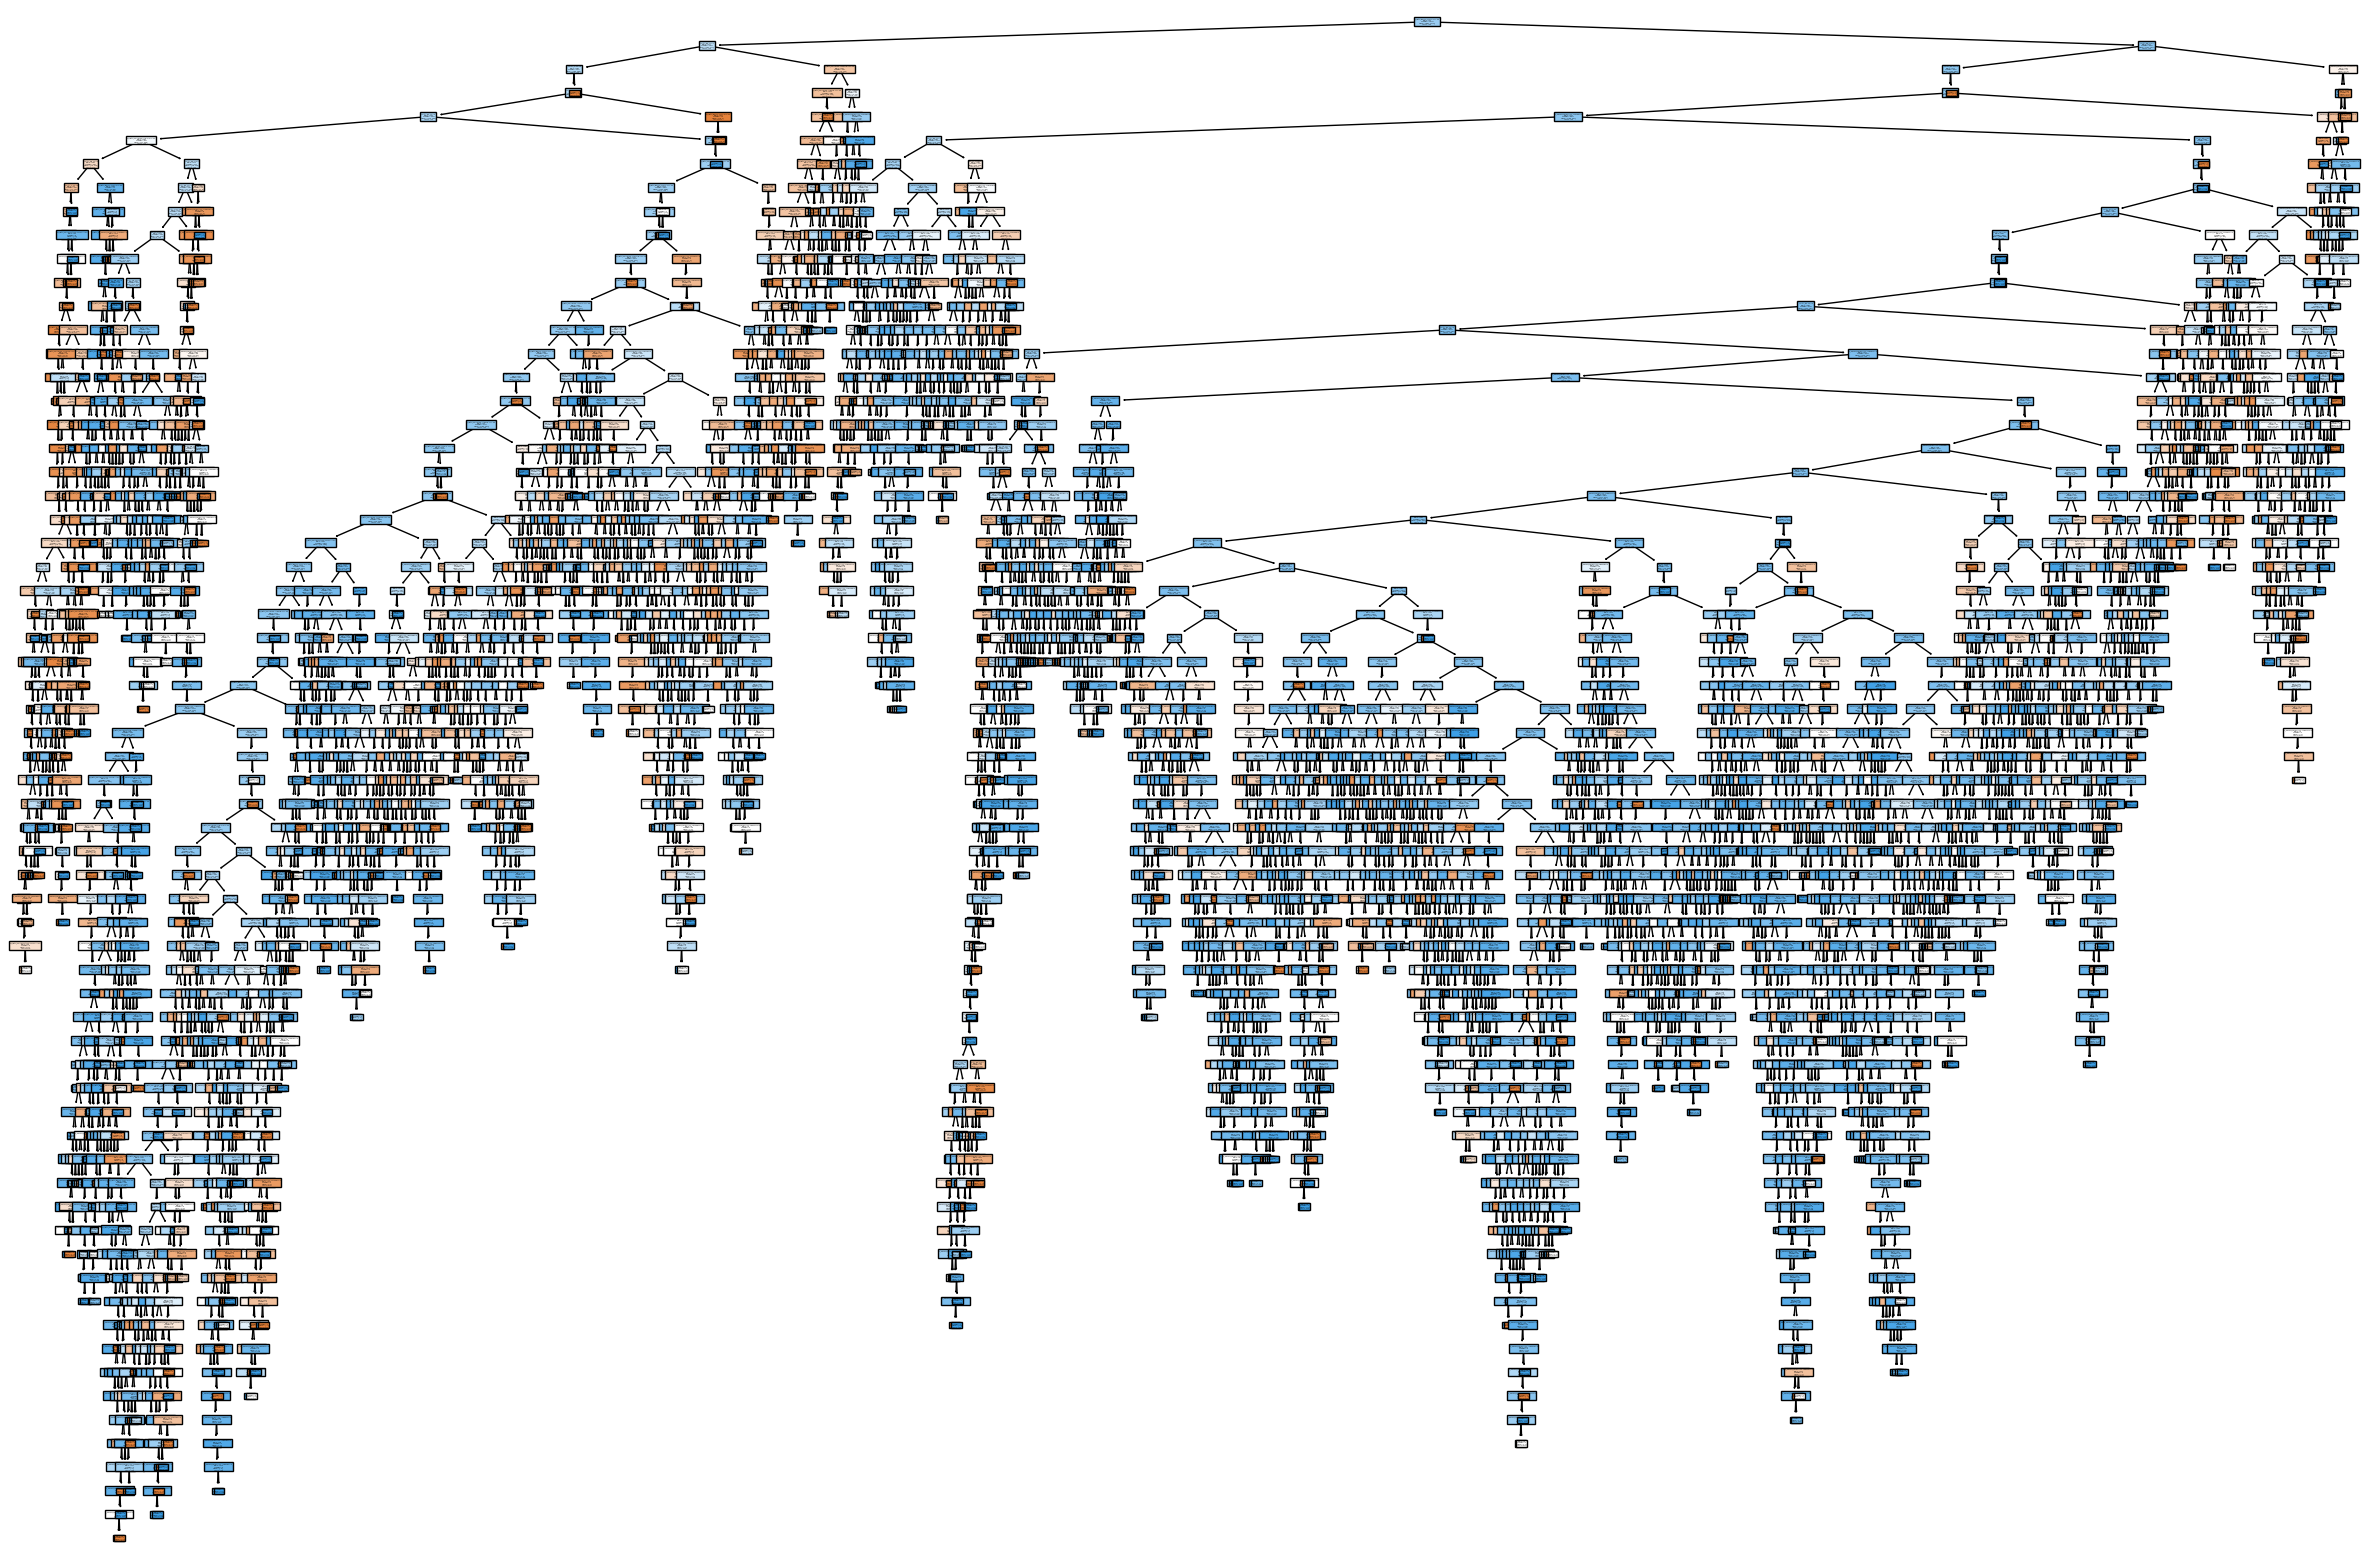

In [6]:
# Visualize a single decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf.estimators_[0], filled=True, feature_names=X.columns, class_names=['False', 'True'])
#plt.savefig('decision_tree.png')
plt.show()

In [7]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1325 1666]
 [1280 4729]]


<AxesSubplot:>

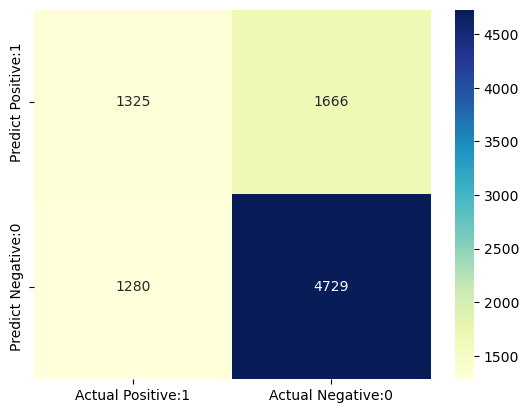

In [8]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [9]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.44      0.47      2991
        True       0.74      0.79      0.76      6009

    accuracy                           0.67      9000
   macro avg       0.62      0.61      0.62      9000
weighted avg       0.66      0.67      0.67      9000



In [10]:
import pickle
with open('rfc_model_pkl', 'wb') as files:
   pickle.dump(clf, files)

In [11]:
y_test.shape

(9000,)